In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [3]:
df = pd.read_csv("articles_data.csv")

In [4]:
df.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,Unnamed: 0,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,10437.000000,10435.000000,10319.000000,10319.000000,10319.000000,10319.000000
mean,5218.000000,0.122089,381.395290,124.032949,196.236263,0.011629
std,3013.046714,0.327404,4433.344792,965.351188,1020.680229,0.268276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2609.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5218.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,7827.000000,0.000000,43.000000,12.000000,47.500000,0.000000
max,10436.000000,1.000000,354132.000000,48490.000000,39422.000000,15.000000


In [7]:
df.shape

(10437, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

In [9]:
df.columns

Index(['Unnamed: 0', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'top_article', 'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count'],
      dtype='object')

In [14]:
data = df[['source_id','author', 'title',
       'description']]

In [15]:
data.head()

,source_id,author,title,description
0,reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...
1,the-irish-times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...
2,the-irish-times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...
3,al-jazeera-english,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...
4,bbc-news,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg..."


In [16]:
data.isnull().sum()

source_id         0
author         1020
title             2
description      24
dtype: int64

In [19]:
data = data.dropna()
data.isnull().sum()

source_id      0
author         0
title          0
description    0
dtype: int64

In [21]:
data.shape

(9406, 4)

In [22]:
data.source_id.unique()

array(['reuters', 'the-irish-times', 'al-jazeera-english', 'bbc-news',
       'abc-news', 'the-new-york-times', 'cnn', 'cbs-news', 'newsweek',
       'business-insider', 'the-wall-street-journal', 'espn', '1'],
      dtype=object)

In [23]:
data['source_id'].value_counts()

reuters                    1252
abc-news                   1137
the-irish-times            1107
business-insider           1048
cnn                         954
cbs-news                    941
the-new-york-times          870
bbc-news                    746
newsweek                    539
al-jazeera-english          469
the-wall-street-journal     294
espn                         48
1                             1
Name: source_id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='source_id'>

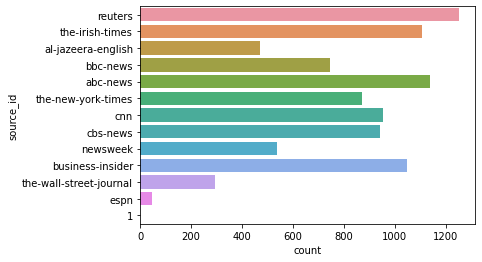

In [24]:
sns.countplot(y=data['source_id'])

In [27]:
data['author'].value_counts().head(10)

The Associated Press                975
Reuters Editorial                   685
CBS News                            637
https://www.facebook.com/bbcnews    533
Al Jazeera                          310
The Irish Times                     254
BBC News                            201
CBS/AP                               69
Dan Cancian                          45
AP                                   35
Name: author, dtype: int64

<AxesSubplot:>

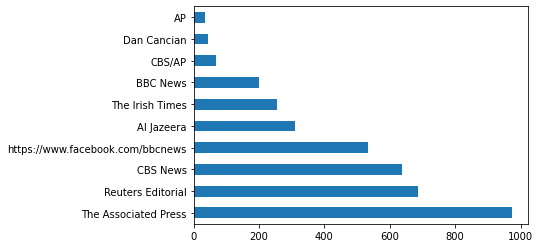

In [29]:
data['author'].value_counts().head(10).plot(kind='barh')

In [33]:
data.head(10)

,source_id,author,title,description
0,reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...
1,the-irish-times,Eoin Burke-Kennedy,Unemployment falls to postcrash low of 52,Latest monthly figures reflect continued growt...
2,the-irish-times,Deirdre McQuillan,Louise Kennedy AW2019 Long coats sparkling twe...,Autumnwinter collection features designers gli...
3,al-jazeera-english,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...
4,bbc-news,BBC News,UK government lawyer says proroguing parliamen...,The UK governments lawyer David Johnston argue...
5,abc-news,The Associated Press,This Tender Land is an affecting story about g...,This Tender Land by William Kent Krueger is an...
6,reuters,Reuters Editorial,EU wants to see if lawmakers will block Brexit...,The European Union is waiting to see if Britis...
7,reuters,Reuters Editorial,European third quarter profit outlook improves...,Earnings and revenue expectations for European...
8,bbc-news,https://www.facebook.com/bbcnews,How are emotional support animals allowed on f...,Theres been support dogs a support turkey and ...
9,the-irish-times,Pat Leahy,Boris Johnson to meet Leo Varadkar in Dublin o...,UK prime minister will meet Taoiseach for talk...


In [30]:
data['title'] = data['title'].replace(r'[^A-Za-z0-9 ]+', '', regex=True)
data['description'] = data['description'].replace(r'[^A-Za-z0-9 ]+', '', regex=True)

In [34]:
data.head(10)

,source_id,author,title,description
0,reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...
1,the-irish-times,Eoin Burke-Kennedy,Unemployment falls to postcrash low of 52,Latest monthly figures reflect continued growt...
2,the-irish-times,Deirdre McQuillan,Louise Kennedy AW2019 Long coats sparkling twe...,Autumnwinter collection features designers gli...
3,al-jazeera-english,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...
4,bbc-news,BBC News,UK government lawyer says proroguing parliamen...,The UK governments lawyer David Johnston argue...
5,abc-news,The Associated Press,This Tender Land is an affecting story about g...,This Tender Land by William Kent Krueger is an...
6,reuters,Reuters Editorial,EU wants to see if lawmakers will block Brexit...,The European Union is waiting to see if Britis...
7,reuters,Reuters Editorial,European third quarter profit outlook improves...,Earnings and revenue expectations for European...
8,bbc-news,https://www.facebook.com/bbcnews,How are emotional support animals allowed on f...,Theres been support dogs a support turkey and ...
9,the-irish-times,Pat Leahy,Boris Johnson to meet Leo Varadkar in Dublin o...,UK prime minister will meet Taoiseach for talk...


In [35]:
data['description'].sample(10)


5109    Switzerlands mighty Aletsch may melt away by e...
215     Apples smartwatch the Apple Watch is getting o...
227     Details of the case remain unclear but its the...
3896    Recent Afrophobic attacks demonstrate the Rain...
1214    Exxon Mobil has agreed to sell its Norwegian o...
2908    Britains opposition leader Jeremy Corbyn said ...
8189    CohhCarnageTwitch Samantha LeeBusiness Insider...
9344    Microsoft announced a new member of the Surfac...
9039    County board chairman said they were surprised...
3132    The US Coast Guard says rescuers have heard no...
Name: description, dtype: object

In [36]:
data['description'][3]

'Han is the first North Korean player in the Serie A and was praised during his appearances during youth World Cups'

In [37]:
def clean_text(text, lemmatizer = WordNetLemmatizer(), 
                  stop_words = set(stopwords.words('english'))):
      
    words = word_tokenize(text)
    
    filtered_words = []
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            filtered_words.append(lemmatizer.lemmatize(word))
    
    return filtered_words

# Title Text analysis


In [38]:
title_word_list = data['title'].apply(lambda x: clean_text(x))

In [39]:
title_word_list[:10]

0    [NTSB, say, Autopilot, engaged, California, Te...
1                 [Unemployment, fall, postcrash, low]
2    [Louise, Kennedy, Long, coat, sparkling, tweed...
3    [North, Korean, footballer, Han, join, Italian...
4    [UK, government, lawyer, say, proroguing, parl...
5      [This, Tender, Land, affecting, story, growing]
6    [EU, want, see, lawmaker, block, Brexit, strik...
7    [European, third, quarter, profit, outlook, im...
8    [How, emotional, support, animal, allowed, fli...
9    [Boris, Johnson, meet, Leo, Varadkar, Dublin, ...
Name: title, dtype: object

In [40]:
title_word_list = [len(w) for w in title_word_list]

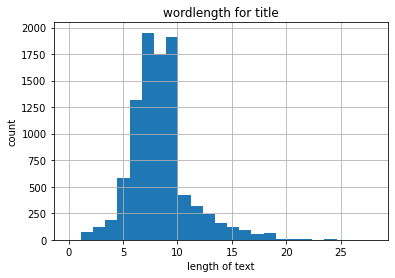

In [41]:
plt.hist(title_word_list,bins = 25)
plt.title('wordlength for title')
plt.ylabel('count')
plt.xlabel('length of text')
plt.grid()
plt.show()

In [43]:
word_title = clean_text(''.join(str(data['title'].tolist())))

In [44]:
word_title[:15]

['say',
 'Autopilot',
 'engaged',
 'California',
 'Tesla',
 'crash',
 'fall',
 'postcrash',
 'low',
 'Kennedy',
 'Long',
 'coat',
 'sparkling',
 'tweed',
 'dress']

# Natural Language Toolkit
The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning

In [45]:
(pd.Series(nltk.ngrams(word_title,2)).value_counts())[:20]

(Wall, Street)            85
(Hurricane, Dorian)       81
(Street, Journal)         65
(World, Cup)              58
(The, Wall)               56
(Hong, Kong)              52
(New, York)               41
(Live, Stream)            38
(White, House)            33
(Boris, Johnson)          30
(Donald, Trump)           30
(trade, war)              29
(North, Carolina)         29
(Where, Watch)            29
(TV, Channel)             27
(impeachment, inquiry)    25
(Saudi, oil)              24
(boat, fire)              24
(nodeal, Brexit)          24
(first, time)             23
dtype: int64

Text(0.5, 0, '# of Occurances')

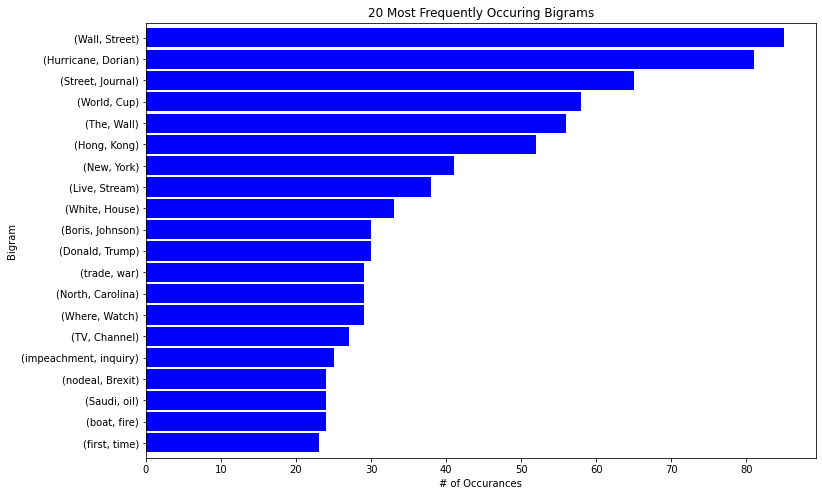

In [51]:
bigrams_series_title = (pd.Series(nltk.ngrams(word_title, 2)).value_counts())[:20]

bigrams_series_title.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

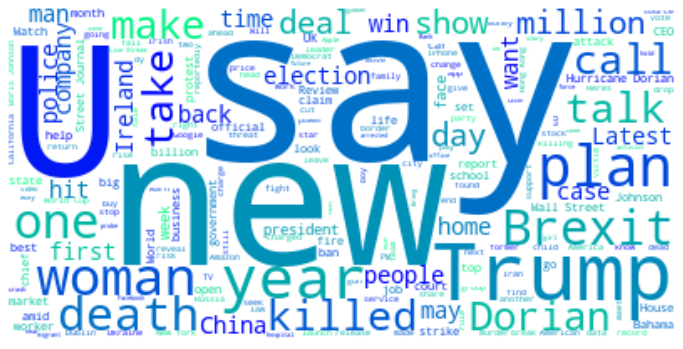

In [53]:
word_cloud = WordCloud(background_color = 'white',max_words = 200,relative_scaling ='auto',colormap='winter')
word_cloud.generate(','.join(word_title))
plt.figure(figsize=(12,10))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Description Text analysis

In [54]:
description_word_list = data['description'].apply(lambda x: clean_text(x))

In [55]:
description_word_list[:10]

0    [The, National, Transportation, Safety, Board,...
1    [Latest, monthly, figure, reflect, continued, ...
2    [Autumnwinter, collection, feature, designer, ...
3    [Han, first, North, Korean, player, Serie, A, ...
4    [The, UK, government, lawyer, David, Johnston,...
5    [This, Tender, Land, William, Kent, Krueger, a...
6    [The, European, Union, waiting, see, British, ...
7    [Earnings, revenue, expectation, European, com...
8    [Theres, support, dog, support, turkey, suppor...
9    [UK, prime, minister, meet, Taoiseach, talk, B...
Name: description, dtype: object

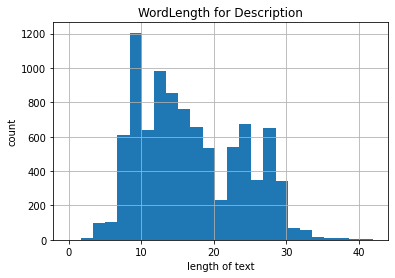

In [56]:
word_length_desc = [len(w) for w in description_word_list]
plt.hist(word_length_desc,bins=25)
plt.title('WordLength for Description')
plt.ylabel('count')
plt.xlabel('length of text')
plt.grid()
plt.show()

In [57]:
words_desc = clean_text(''.join(str(df['description'].tolist())))

In [58]:
words_desc[:15]

['The',
 'National',
 'Transportation',
 'Safety',
 'Board',
 'said',
 'Tuesday',
 'Tesla',
 'Model',
 'S',
 'Autopilot',
 'mode',
 'struck',
 'fire',
 'truck']

In [59]:
(pd.Series(nltk.ngrams(words_desc,3)).value_counts())[:20]

(video, coverage, exclusive)        408
(national, world, news)             408
(news, broadcast, video)            408
(top, news, online)                 408
(news, online, ABC)                 408
(coverage, exclusive, interview)    408
(Find, top, news)                   408
(exclusive, interview, Find)        408
(online, ABC, news)                 408
(interview, Find, top)              408
(broadcast, video, coverage)        408
(breaking, national, world)         408
(world, news, broadcast)            408
(President, Donald, Trump)          196
(latest, five, minute)               89
(bulletin, BBC, World)               89
(five, minute, news)                 89
(news, bulletin, BBC)                89
(BBC, World, Service)                89
(minute, news, bulletin)             89
dtype: int64

Text(0, 0.5, 'trigram')

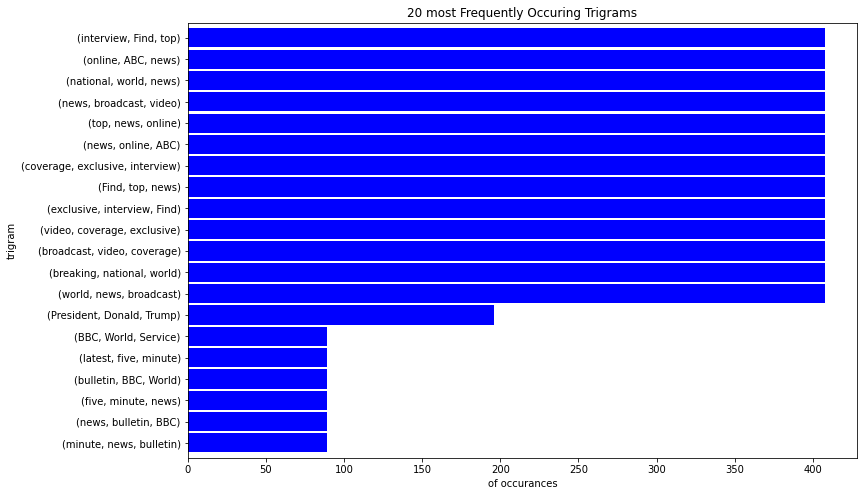

In [66]:
trigrams_series_title = (pd.Series(nltk.ngrams(words_desc, 3)).value_counts())[:20]
trigrams_series_title.sort_values().plot.barh(color='blue',width=.9,figsize=(12, 8))
plt.title('20 most Frequently Occuring Trigrams')
plt.xlabel('of occurances')
plt.ylabel('trigram')


Text(0.5, 0, '# of Occurances')

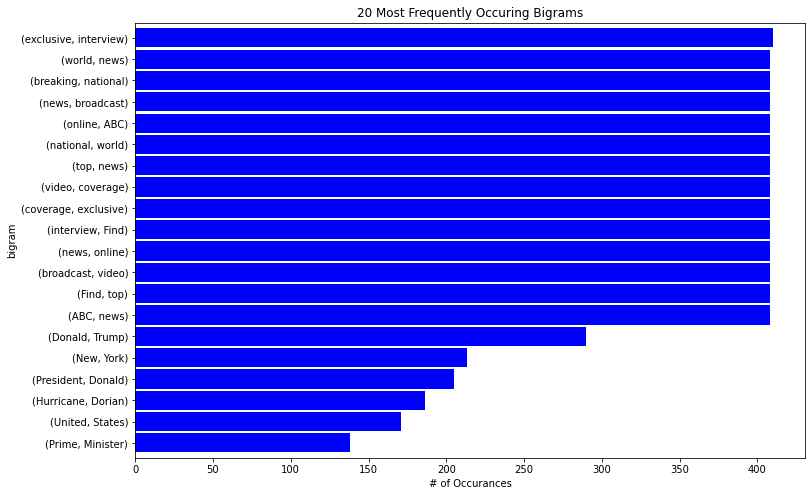

In [67]:
bigrams_series_title = (pd.Series(nltk.ngrams(words_desc, 2)).value_counts())[:20]

bigrams_series_title.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('bigram')
plt.xlabel('# of Occurances')

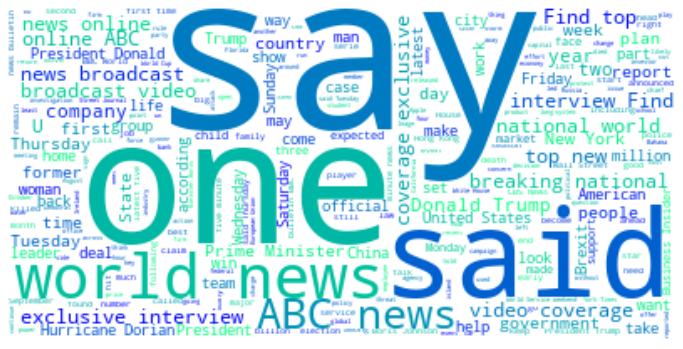

In [68]:
word_cloud = WordCloud(background_color="white", 
               max_words=2000,
               relative_scaling='auto',
               colormap='winter')

word_cloud.generate(','.join(words_desc))
plt.figure( figsize=(12,10) )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()